# Business understanding

## Data Understanding

## Data Preparation

In [119]:
import pandas  as pd
df = pd.read_csv('data/marketing_campaign.csv', sep='\t')
df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df["Age"] = 2025 - df["Year_Birth"]
df.drop(['ID'] , axis=1, inplace=True)
df.drop(df[df['Income'] > 200000].index, inplace = True)
df.dropna()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Age
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,3,11,1,1617,68
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,3,11,0,27,71
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,3,11,0,776,60
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,3,11,0,53,41
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,3,11,0,422,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,0,0,0,0,0,3,11,0,1341,58
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,0,0,1,0,0,3,11,0,444,79
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,1,0,0,0,0,3,11,0,1241,44
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,0,0,0,0,0,3,11,0,843,69


In [122]:
features = ["Income","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds","Kidhome", "Teenhome","NumWebPurchases","NumCatalogPurchases","Age"]
X = df[features]
X = X.dropna()

## Data Modeling

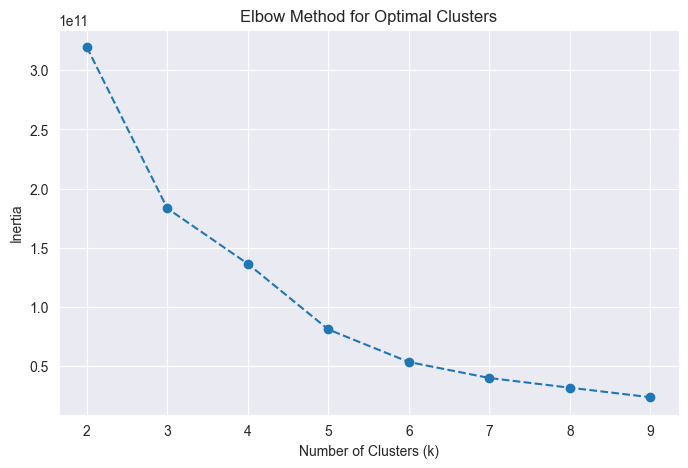

In [123]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



inertia = []
K_range = range(2, 10) 

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)  

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()
    
    

In [132]:
model = KMeans(init='random', n_clusters=4, random_state=42).fit(X)
X['Cluster'] = model.labels_
X['Cluster'].value_counts()


Cluster
3    677
2    672
0    460
1    406
Name: count, dtype: int64

<Axes: xlabel='Cluster'>

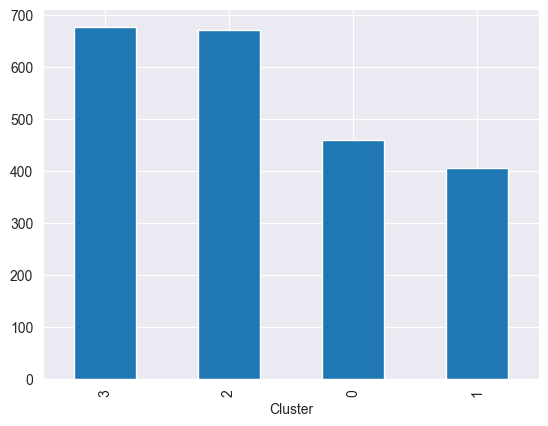

In [133]:
X['Cluster'].value_counts().plot(kind='bar')

In [134]:

X.groupby('Cluster').mean()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Kidhome,Teenhome,NumWebPurchases,NumCatalogPurchases,Age
Cluster,,,,,,,,,,,,
0,23381.952174,18.017391,5.830435,21.630435,8.441304,5.767391,16.400000,0.780435,0.206522,1.971739,0.467391,50.539130
1,82719.044335,657.241379,64.763547,468.945813,91.130542,67.536946,71.500000,0.071429,0.238916,5.258621,6.007389,57.285714
2,62821.206845,475.211310,35.748512,205.694940,50.065476,35.778274,62.910714,0.200893,0.720238,5.629464,3.730655,59.058036
3,42182.809453,120.537666,7.964549,46.493353,13.103397,8.536189,27.423929,0.672083,0.655835,3.286558,1.118168,56.503693


In [138]:

X.loc[X["Cluster"] == 1, "Segment"] = "Rich"
X.loc[X["Cluster"] == 2, "Segment"] = "High income"
X.loc[X["Cluster"] == 3, "Segment"] = "Medium income"
X.loc[X["Cluster"] == 0, "Segment"] = "Low income"


# Display cluster counts
print(X["Segment"].value_counts())

X

Segment
Medium income    677
High income      672
Low income       460
Rich             406
Name: count, dtype: int64


,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Kidhome,Teenhome,NumWebPurchases,NumCatalogPurchases,Age,Cluster,Segment
0,58138.0,635,88,546,172,88,88,0,0,8,10,68,2,High income
1,46344.0,11,1,6,2,1,6,1,1,1,1,71,3,Medium income
2,71613.0,426,49,127,111,21,42,0,0,8,2,60,2,High income
3,26646.0,11,4,20,10,3,5,1,0,2,0,41,0,Low income
4,58293.0,173,43,118,46,27,15,1,0,5,3,44,2,High income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,709,43,182,42,118,247,0,1,9,3,58,2,High income
2236,64014.0,406,0,30,0,0,8,2,1,8,2,79,2,High income
2237,56981.0,908,48,217,32,12,24,0,0,2,3,44,2,High income
2238,69245.0,428,30,214,80,30,61,0,1,6,5,69,2,High income


In [128]:
from sklearn.metrics import silhouette_score
# Compute Silhouette Score
silhouette = silhouette_score(X, model.labels_)
print(f"Silhouette Score for 3 clusters: {silhouette:.2f}")

Silhouette Score for 3 clusters: 0.53


## Results Evaluation

<Axes: xlabel='Segment'>

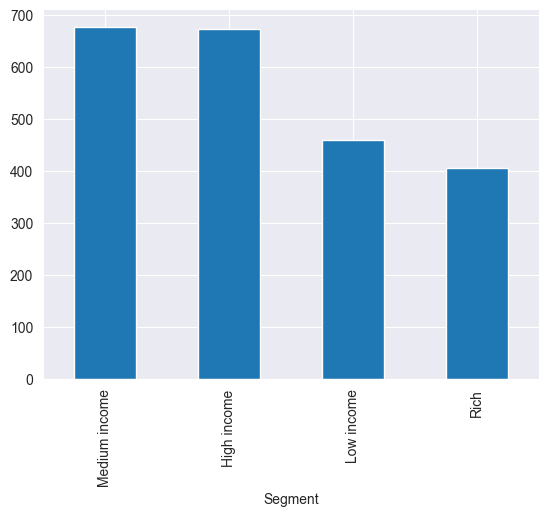

In [140]:
X['Segment'].value_counts().plot(kind='bar')